In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/earth_engine.parquet")
df.head()

,name,total_pixels,elevation_mean,elevation_min,elevation_max,day_temp_mean,day_temp_min,day_temp_max,night_temp_mean,night_temp_min,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
0,-124.5_40.0,136,19.191799,0,603,20.218264,15.569330,23.008962,11.368067,10.211949,...,0.078431,0.039216,0.032680,0.006536,0.006536,0.006536,0.006536,0.006536,0.006536,0.686275
1,-124.5_40.25,474,149.579082,0,835,18.502147,11.282973,24.777535,9.836830,7.891062,...,0.085540,0.101833,0.030550,0.006110,0.002037,0.002037,0.002037,0.002037,0.002037,0.362525
2,-124.5_40.5,421,38.093112,-2,645,15.821732,11.407486,20.084343,8.120768,6.343226,...,0.036530,0.038813,0.084475,0.020548,0.002283,0.002283,0.002283,0.002283,0.002283,0.618721
3,-124.25_39.75,117,1.179847,0,488,15.392123,14.029692,16.968766,11.172921,10.688841,...,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.873134
4,-124.25_40.0,511,277.559524,0,1085,19.006655,13.470183,24.122592,11.361455,9.681276,...,0.017045,0.001894,0.001894,0.018939,0.001894,0.001894,0.001894,0.001894,0.001894,0.261364


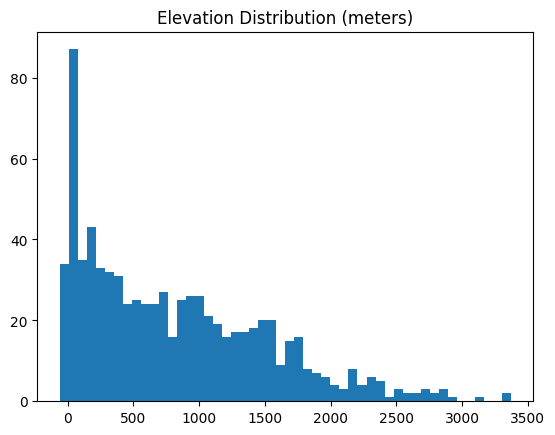

In [3]:
plt.hist(df["elevation_mean"], bins=50)
plt.title("Elevation Distribution (meters)")
plt.show()

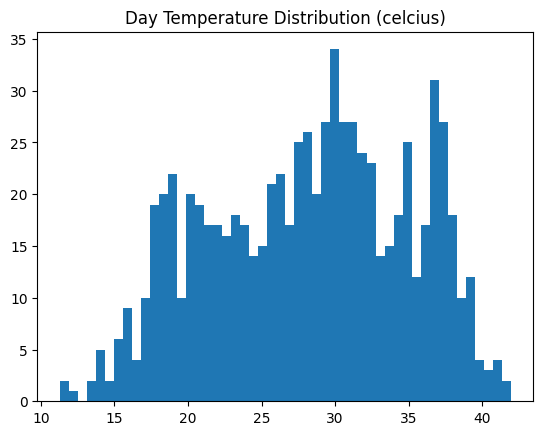

In [4]:
plt.hist(df[df.day_temp_mean > -10]["day_temp_mean"], bins=50)
plt.title("Day Temperature Distribution (celcius)")
plt.show()

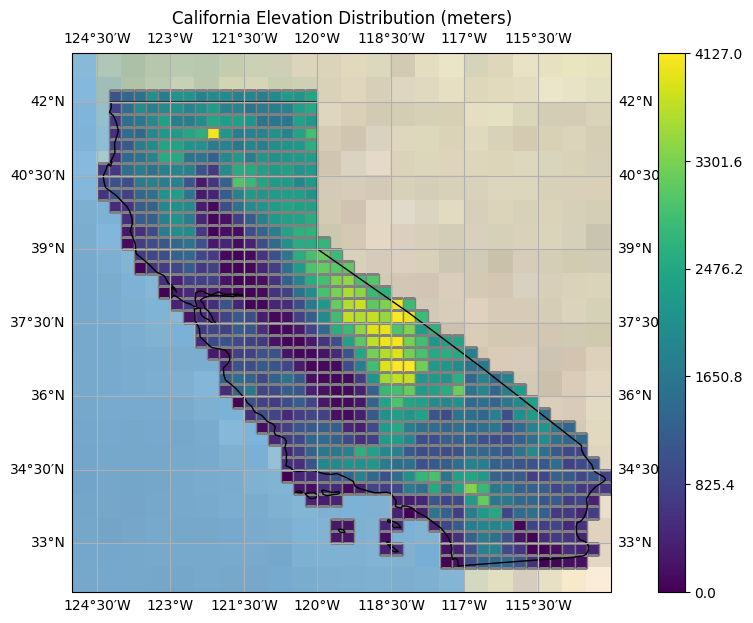

In [5]:
from birdcall_distribution.geo import get_shape_us_state, generate_grid, CA_EXTENT
from birdcall_distribution.plot import dataframe_color_getter, plot_grid
from functools import partial

grid_size = (0.25, 0.25)
ca_shape = get_shape_us_state("California")
grid = generate_grid(ca_shape, CA_EXTENT, grid_size)


def plot_ca(prop):
    plot_grid(
        ca_shape,
        CA_EXTENT,
        grid,
        color_callback=partial(dataframe_color_getter, df, "name", prop),
        vmin=df[prop].min(),
        vmax=df[prop].max(),
    )


plot_ca("elevation_max")
plt.title("California Elevation Distribution (meters)")
plt.show()

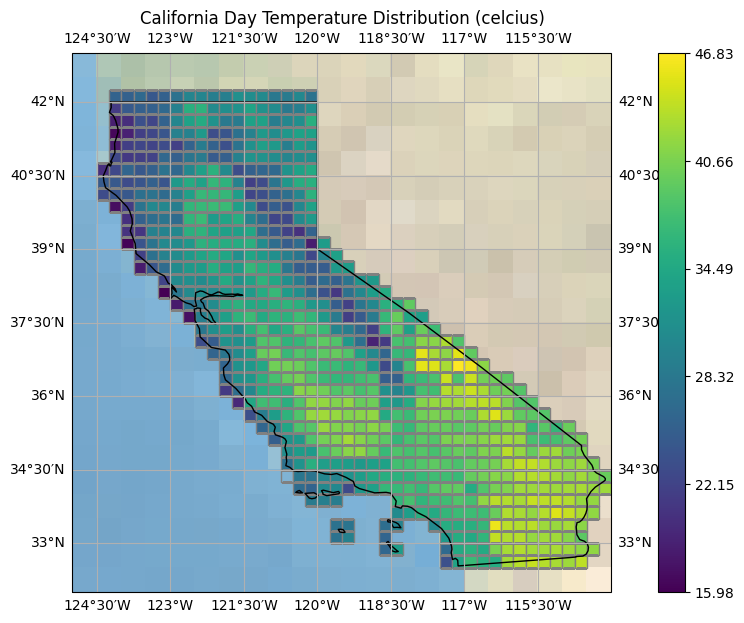

In [6]:
plot_ca("day_temp_max")
plt.title("California Day Temperature Distribution (celcius)")
plt.show()

## landcover statistics

We choose a handful of interesting looking cover fields. [link to band guide](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD12Q1#bands)


In [7]:
df.iloc[:, -17:].sum()

land_cover_01     87.477437
land_cover_02     13.412091
land_cover_03      1.445720
land_cover_04      1.677043
land_cover_05      2.897278
land_cover_06     18.813298
land_cover_07     80.469316
land_cover_08     61.687132
land_cover_09     64.657476
land_cover_10    177.924307
land_cover_11      3.134303
land_cover_12     69.443561
land_cover_13     27.236153
land_cover_14      1.926021
land_cover_15      1.454054
land_cover_16    109.392241
land_cover_17     47.952567
dtype: float64

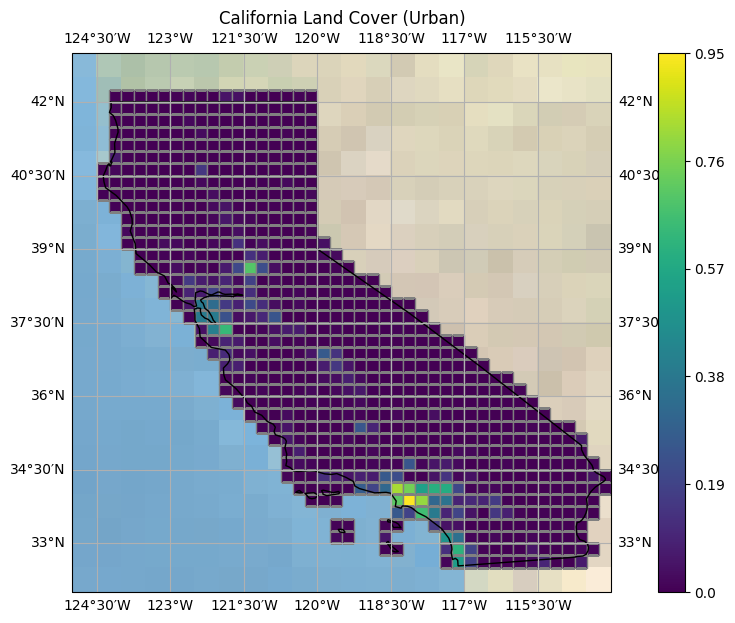

In [8]:
plot_ca("land_cover_13")
plt.title("California Land Cover (Urban)")
plt.show()

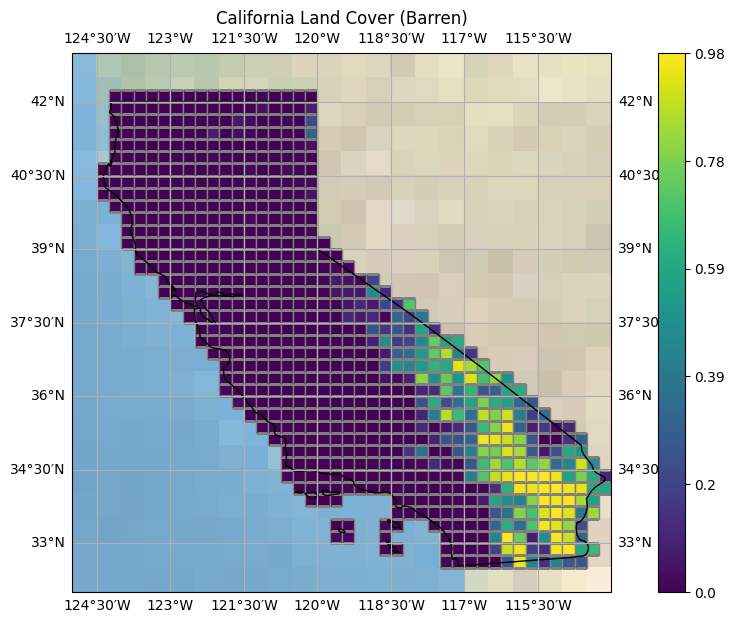

In [9]:
plot_ca("land_cover_16")
plt.title("California Land Cover (Barren)")
plt.show()

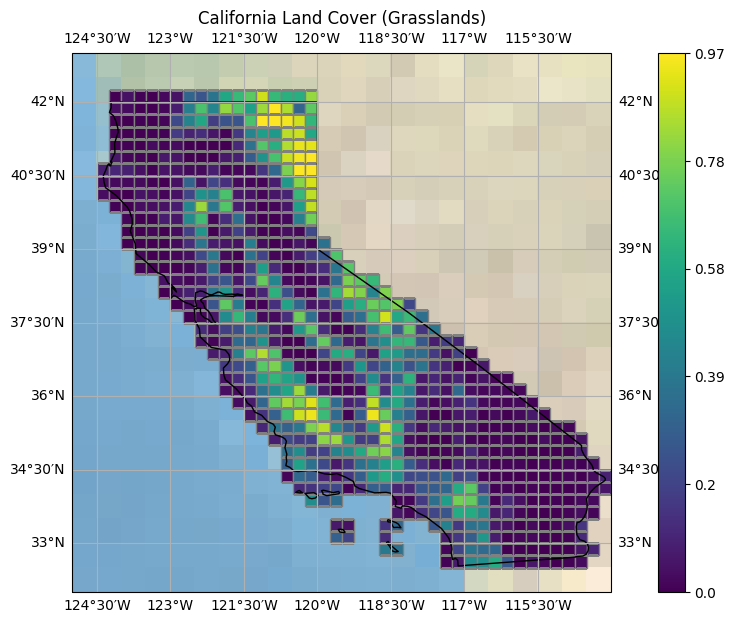

In [10]:
plot_ca("land_cover_10")
plt.title("California Land Cover (Grasslands)")
plt.show()

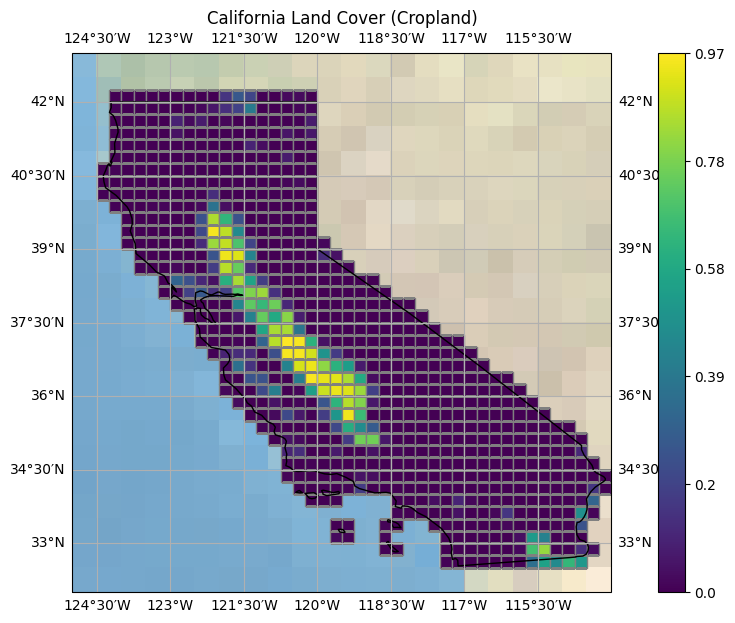

In [11]:
plot_ca("land_cover_12")
plt.title("California Land Cover (Cropland)")
plt.show()